#IMPORTING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/DATASET/


archive.zip  test  train  validation


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/DATASET/archive.zip'
extract_path = '/content/drive/MyDrive/DATASET'


os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")


Extraction completed!


In [ ]:
!unzip /content/drive/MyDrive/DATASET/archive.zip -d /content/DATASET


Archive:  /content/drive/MyDrive/DATASET/archive.zip
  inflating: /content/DATASET/test/apple/Image_1.jpg  
  inflating: /content/DATASET/test/apple/Image_10.jpg  
  inflating: /content/DATASET/test/apple/Image_2.jpg  
  inflating: /content/DATASET/test/apple/Image_3.jpg  
  inflating: /content/DATASET/test/apple/Image_4.jpg  
  inflating: /content/DATASET/test/apple/Image_5.jpg  
  inflating: /content/DATASET/test/apple/Image_6.JPG  
  inflating: /content/DATASET/test/apple/Image_7.jpg  
  inflating: /content/DATASET/test/apple/Image_8.jpg  
  inflating: /content/DATASET/test/apple/Image_9.jpg  
  inflating: /content/DATASET/test/banana/Image_1.jpg  
  inflating: /content/DATASET/test/banana/Image_10.jpg  
  inflating: /content/DATASET/test/banana/Image_2.jpg  
  inflating: /content/DATASET/test/banana/Image_3.jpg  
  inflating: /content/DATASET/test/banana/Image_4.jpg  
  inflating: /content/DATASET/test/banana/Image_5.jpg  
  inflating: /content/DATASET/test/banana/Image_6.jpg  
  i

#Importing libraries


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#DATA PREPROCESSING (#training image preprocessing)

 #training image preprocessing



In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/DATASET/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,

)






Found 3115 files belonging to 36 classes.


# DATA PREPROCESSING (#VALIDATION image preprocessing)

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/DATASET/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 351 files belonging to 36 classes.


#BUILDING MODEL CNN


In [ ]:
cnn = tf.keras.models.Sequential()

#1ST LAYER Building Convolution layer (CONV)
#2ND LAYER Building Pooling (POOL)

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#FLATNING PROCCESS BEFORE PASSING TO NEURAL NETWORK

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#BUILD NEURAL NETWORK 3RD LAYER(hidden layer)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation ='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation ='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #Dropping some neuron to avoid overfitting

#OUTPUT LAYER


In [ ]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) #36 classes are there

#COMPILING AND TRAINING PHASE


In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,745,312 (21.92 MB)

 Trainable params: 5,745,312 (21.92 MB)

 Non-trainable params: 0 (0.00 B)

#TRAINING PART

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9641 - loss: 0.1692 - val_accuracy: 0.9516 - val_loss: 0.6853
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9694 - loss: 0.1288 - val_accuracy: 0.9516 - val_loss: 0.9679
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9767 - loss: 0.1105 - val_accuracy: 0.9487 - val_loss: 0.9472
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9787 - loss: 0.1078 - val_accuracy: 0.9544 - val_loss: 0.5465
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9729 - loss: 0.1382 - val_accuracy: 0.9630 - val_loss: 0.6914
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9772 - loss: 0.1156 - val_accuracy: 0.9487 - val_loss: 0.9299
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.9686 - loss: 0.1748 - val_accuracy: 0.9573 - val_loss: 0.9931
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9748 - loss: 0.1260 - val_accuracy: 0.9573 - v

#TRAINING MODEL


In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #return dictionary of history

{'accuracy': [0.9691813588142395,
  0.9704654812812805,
  0.9736757874488831,
  0.9752808809280396,
  0.9727126955986023,
  0.9743177890777588,
  0.9730337262153625,
  0.9739968180656433,
  0.9768860340118408,
  0.9800962805747986,
  0.9778491258621216,
  0.9707865118980408,
  0.9704654812812805,
  0.9727126955986023,
  0.9743177890777588,
  0.9733547568321228,
  0.9736757874488831,
  0.9775280952453613,
  0.9768860340118408,
  0.9788122177124023,
  0.972391664981842,
  0.9762439727783203,
  0.9775280952453613,
  0.9784911870956421,
  0.9752808809280396,
  0.9781701564788818,
  0.9784911870956421,
  0.9797753095626831,
  0.9759229421615601,
  0.9778491258621216,
  0.9804173111915588,
  0.9768860340118408],
 'loss': [0.143305242061615,
  0.13470661640167236,
  0.1488092690706253,
  0.12737171351909637,
  0.13443119823932648,
  0.1353328824043274,
  0.15081070363521576,
  0.1252380609512329,
  0.11843957006931305,
  0.09081778675317764,
  0.12784266471862793,
  0.14688558876514435,
  0.1

In [ ]:
#recording HISTORY in json
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#calculating accuracy of model achieve on validation set

In [ ]:


print("validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


validation set Accuracy: 95.15669345855713 %


#ACCURACY VISUALIZATION

training visualization

In [ ]:
epochs=[i for i in range(1,31)]

In [ ]:
epochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

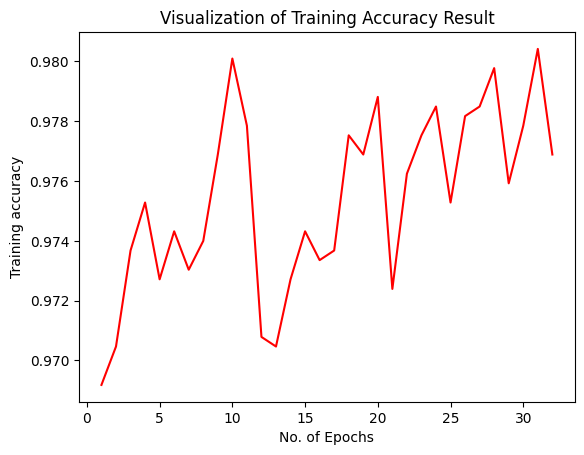

In [ ]:
epochs=[i for i in range(1,31)]

# Check the length of the accuracy data
num_accuracy_points = len(training_history.history['accuracy'])

# Adjust the epochs list to match the length of the accuracy data
# This assumes you want to plot all accuracy points
epochs = list(range(1, num_accuracy_points + 1)) # Ensures both lists have the same length

plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()





In [ ]:
epochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

#VALIDATION ACCURACY


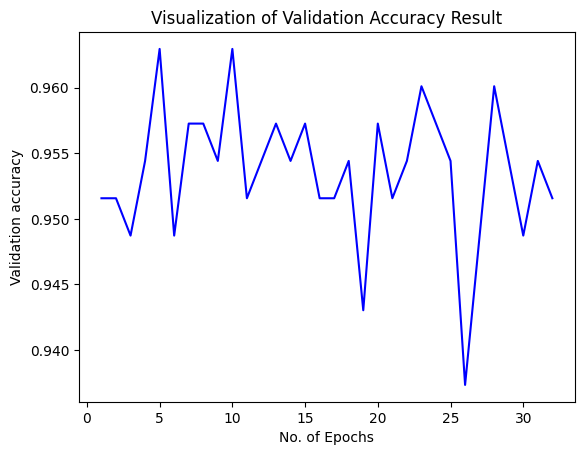

In [ ]:
   plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
   plt.xlabel('No. of Epochs')
   plt.ylabel('Validation accuracy')
   plt.title('Visualization of Validation Accuracy Result')
   plt.show()

#EVALUATING CNN MODEL

#TRAINING

In [ ]:
training_loss, training_accuracy = cnn.evaluate(training_set)

98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 882ms/step - accuracy: 0.9875 - loss: 0.0417


In [ ]:
training_accuracy

0.9890850782394409

#VALIDATION

In [ ]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9317 - loss: 1.0411


In [ ]:
val_accuracy

0.9515669345855713

#TEST SET EVALUATION


#TEST

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DATASET/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,

)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_accuracy = cnn.evaluate(test_set)

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9514 - loss: 0.6050


In [ ]:
test_accuracy

0.9526462554931641